In [1]:
import re
import pandas as pd
import geopy
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.style as style
from datetime import datetime
from IPython.display import display
from matplotlib import animation
from IPython.display import HTML
import geopandas
from shapely.geometry import Point, Polygon
import geoplot

In [2]:
# import data and saved coordinate data
df = pd.read_csv(r"Police_Incident_Reports.csv", index_col='IncidentID')
rc = pd.read_csv(r"Rob_cords.csv")

In [3]:
#Finding out total amount of different crimes
#Selecting most popular crime, robbery, from dataset

df['IncidentType'] = df['IncidentType'].astype(str)
crime_count = df.IncidentType.value_counts()
Robbery=df[df['IncidentType']=='Robbery']
Robbery=Robbery.drop(columns=['DateModified',"ReleasedBy", 'Suspect','Details'])


In [4]:
# Adding city and state onto each of the addreses in order for the locator to find them correctly
Robbery['Address']=Robbery['Address'] + ' Madison WI'
Robbery=Robbery.reset_index()
# Make sure all values are strings and create an empty array for addresses that we are going to keep.
adres=Robbery.Address.astype(str)

In [5]:
Real_ad=[]

# Cleaning Data
for b in range(len(adres)):
    str=adres.iloc[b]
    Real_ad.append(str)
    Real_ad[b]=Real_ad[b].replace('block',"")
    Real_ad[b]=Real_ad[b].replace('Block','')
    Real_ad[b] = Real_ad[b].replace('Dream Lanes', '')
    Real_ad[b] = Real_ad[b].replace('@', '')
    Real_ad[b] = re.sub(r'\(.*\)', '', Real_ad[b])
    Real_ad[b] = Real_ad[b].replace('Browing', 'Browning')
    Real_ad[b] = Real_ad[b].replace('of', '')


In [6]:
# Removes address that do not have a street number attached
Real_add=[]
for b in range(len(adres)):
    if Real_ad[b][0].isdigit():
        Real_add.append(Real_ad[b])
    else:
        Robbery=Robbery.drop([b])


In [ ]:
# creates two empty arrays to store the calcualted longitude and latitude values
latitudes=[]
longitudes=[]


Robbery=Robbery.reset_index()
# TAKES A LONG TIME, SINCE WE ALREADY CALCED LATITUDE/LONGITUDE USE THE CSV FILE WITH COORDINATES. SKIP FOR NOW
# Calculates longitude and latitude of each address in the robbery dataframe
for i in range(0,len(Real_add)):
    time.sleep(3)
    geolocator = geopy.geocoders.Nominatim(user_agent='specify_your_name',timeout=5)
    location=geolocator.geocode(Real_add[i])
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
        
    else:
        latitudes.append('')
        longitudes.append('')
    print(len(latitudes))

In [7]:
#Converts to date time for easier analysis later

d=pd.to_datetime(rc['IncidentDate'])
rc['date']=d.dt.date
rc['year'] = d.dt.year
rc['time']=d.dt.time
rc['month']=d.dt.month
rc['all'] = d



In [8]:
#Converting coordintaes to dataframe
coords = pd.DataFrame(rc['latitude'])
coords['longitude'] = rc['longitude']
coords['year'] = rc['year']

#Cleaning coordinates that are not in the bounds of Madison
coords = coords[coords['latitude'] >= 43]
coords = coords[coords['latitude'] <= 43.175]
coords = coords[coords['longitude'] >= -89.60]
coords = coords[coords['longitude'] <= -89.25]
year = coords['year']

#Converting coordinates to data type that Geopandas can use
geometry = [Point(xy) for xy in zip(coords['longitude'],coords['latitude'])]
gdf = geopandas.GeoDataFrame(year,geometry=geometry)


In [9]:
#Police Station locations
plats=[43.072049,43.075167,43.129616,43.085111,43.039633,43.042610,43.033603,43.076116]
plongs=[-89.382137,-89.384832,-89.355284,-89.285476,-89.395817,-89.405376,-89.497485,-89.444309]
ppairs=list(zip(plongs,plats))

station_geo = [Point(xy) for xy in ppairs]
gdfp = geopandas.GeoDataFrame(geometry = station_geo)
gdfp

,geometry
0,POINT (-89.382137 43.072049)
1,POINT (-89.384832 43.075167)
2,POINT (-89.355284 43.129616)
3,POINT (-89.285476 43.085111)
4,POINT (-89.39581699999999 43.039633)
5,POINT (-89.405376 43.04261)
6,POINT (-89.497485 43.033603)
7,POINT (-89.444309 43.076116)


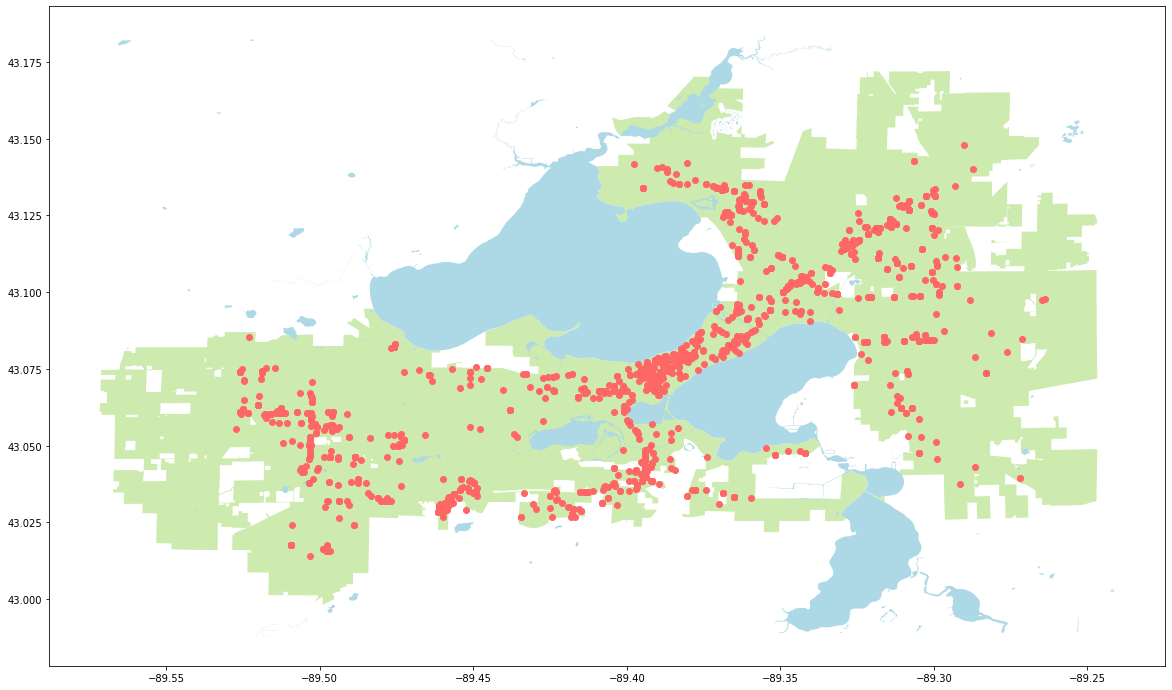

In [10]:
#Plotting location of Robberies from 2006-2018
city = geopandas.read_file('city')
lakes = geopandas.read_file('lakes')
ax = city.plot(color = '#CDEBAF', figsize=(20,20))
lakes.plot(color = 'lightblue', ax=ax)
gdf.plot(color = '#FF6666', ax=ax)


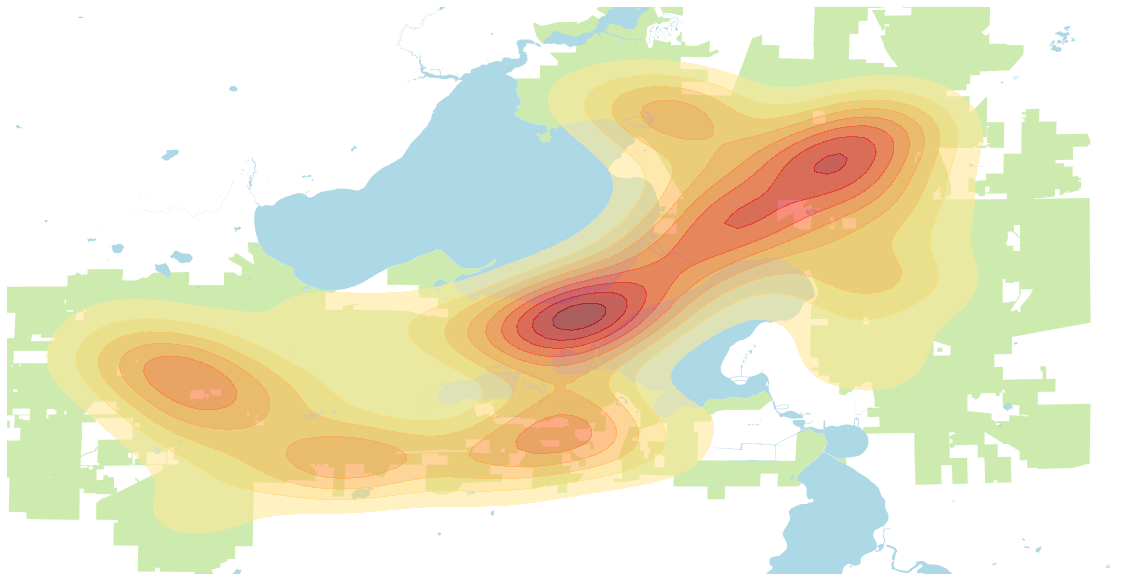

In [11]:
#Heatmap of the same data for better understanding

city = geopandas.read_file('city')
lakes = geopandas.read_file('lakes')
ax = city.plot(color = '#CDEBAF', figsize=(20,20))
lakes.plot(color = 'lightblue', ax=ax)
geoplot.kdeplot(
    gdf, cmap = 'YlOrRd', alpha = .6,
    shade = True, ax=ax,
    gridsize = 100,
    )
#Todo: Change color Scheme, maybe
print()

In [12]:
#Creates coordinate dictionary for easier access

pairs_dict2 = {2006:gdf['geometry'][gdf['year'] == 2006],
              2007:gdf['geometry'][gdf['year'] == 2007],
              2008:gdf['geometry'][gdf['year'] == 2008],
              2009:gdf['geometry'][gdf['year'] == 2009],
              2010:gdf['geometry'][gdf['year'] == 2010],
              2011:gdf['geometry'][gdf['year'] == 2011],
              2012:gdf['geometry'][gdf['year'] == 2012],
              2013:gdf['geometry'][gdf['year'] == 2013],
              2014:gdf['geometry'][gdf['year'] == 2014],
              2015:gdf['geometry'][gdf['year'] == 2015],
              2016:gdf['geometry'][gdf['year'] == 2016],
              2017:gdf['geometry'][gdf['year'] == 2017],
              2018:gdf['geometry'][gdf['year'] == 2018]              
              }


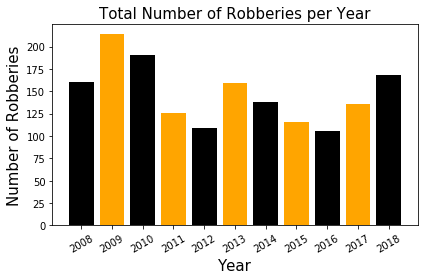

In [13]:
#Plot of Total number of Robberies per year

counts = [160,214,190,126,109,159,138,116,106,136,168]
year = [2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018]
plt.bar(year, counts, color =('black', 'orange','black', 'orange','black', 'orange','black', 'orange','black', 'orange','black'))
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Robberies", fontsize=15)
plt.xticks(year, rotation = 30, fontsize=10)
plt.title("Total Number of Robberies per Year", fontsize=15)
style.use('ggplot')
plt.tight_layout()
plt.savefig('Robberies_year.png' ,dpi=300)

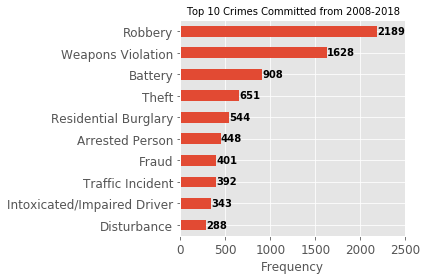

In [14]:
#Plot of top 10 crimes in Madison 

df['IncidentType'] = df['IncidentType'].astype('str')
crime_count = df.IncidentType.value_counts()
top_crime=crime_count.head(10)
numbers = pd.Series(top_crime).values
ax=top_crime.plot(kind='barh', legend=False, fontsize=12)
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Top 10 Crimes Committed from 2008-2018', fontsize=10)
for i, v in enumerate(numbers):
    ax.text(v+3, i+.125, v, fontweight='bold')
plt.tight_layout()
plt.xlim([0, 2500])
plt.savefig('topcrimes.png', dpi=300)

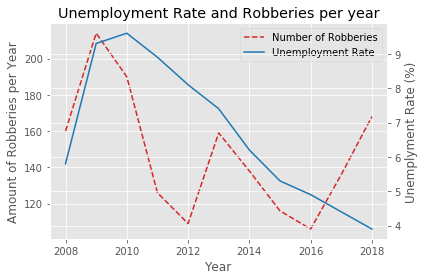

In [15]:
#Plot of Number of Robberies per year and Unemployment rate.

counts = [160,214,190,126,109,159,138,116,106,136,168]
year = [2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018]
rate = [5.8,9.3, 9.6,8.9,8.1,7.4,6.2,5.3,4.9,4.4,3.9]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount of Robberies per Year')
lns1=ax1.plot(year, counts, color=color, ls='--',label='Number of Robberies')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemplyment Rate (%)')  # we already handled the x-label with ax1
lns2=ax2.plot(year, rate, color=color,label='Unemployment Rate')
ax2.tick_params(axis='y', )
style.use('ggplot')
# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
ax1.set_title('Unemployment Rate and Robberies per year')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('RobberiesvsUnemployment.png' ,dpi=300)
plt.show()


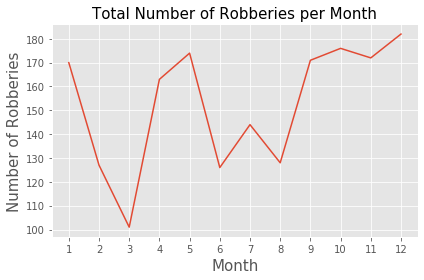

In [16]:
#Plot of total number of Robberies per month

amount = []
for i in range(0,12):
    month = 1 + i 
    count = len(rc[rc['month']==month])
    amount.append(count)
months = np.arange(1,13)
plt.plot(months, amount)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Robberies", fontsize=15)
plt.xticks(months, fontsize=10)
plt.title("Total Number of Robberies per Month", fontsize=15)
style.use('ggplot')
plt.tight_layout()
plt.savefig('Robberies_month.png' ,dpi=300)

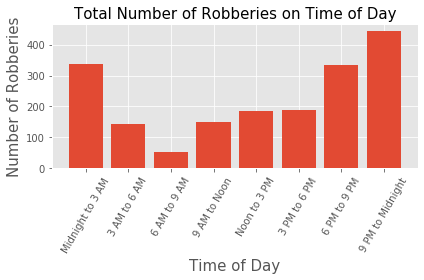

In [17]:
#Plot of Robberies given time of day

rc['Stime'] = rc['all']
rc.reset_index()
for i in range(0, len(rc)):
    rc.loc[i,'Stime'] = rc.loc[i, 'Stime'].strftime("%H:%M:%S")
_03 = []
_36 = []
_69 = []
_912 = []
_1215 = []
_1518 = []
_1821 = []
_210 = []
time_1 = '00:00:00'
time_2 = '03:00:00'
time_3 = '06:00:00'
time_4 = "09:00:00"
time_5 = "12:00:00"
time_6 = "15:00:00"
time_7 = "18:00:00"
time_8 = "21:00:00"

for i in range(0, len(rc)):
    if rc.loc[i,'Stime'] >= time_1 and rc.loc[i,'Stime'] < time_2:
        _03.append(rc.loc[i,:])
    elif rc.loc[i,'Stime'] >= time_2 and rc.loc[i,'Stime'] < time_3:
        _36.append(rc.loc[i,'Stime'])
    elif rc.loc[i,'Stime'] >= time_3 and rc.loc[i,'Stime'] < time_4:
        _69.append(rc.loc[i,'Stime'])
    elif rc.loc[i,'Stime'] >= time_4 and rc.loc[i,'Stime'] < time_5:
        _912.append(rc.loc[i,'Stime'])
    elif rc.loc[i,'Stime'] >= time_5 and rc.loc[i,'Stime'] < time_6:
        _1215.append(rc.loc[i,'Stime'])
    elif rc.loc[i,'Stime'] >= time_6 and rc.loc[i,'Stime'] < time_7:
        _1518.append(rc.loc[i,'Stime'])
    elif rc.loc[i,'Stime'] >= time_7 and rc.loc[i,'Stime'] < time_8:
        _1821.append(rc.loc[i,'Stime'])
    else:
        _210.append(rc.loc[i,'Stime'])
    
numbers = [len(_03),len(_36),len(_69),len(_912),len(_1215),len(_1518),len(_1821),len(_210), ]

labels = ['Midnight to 3 AM', '3 AM to 6 AM','6 AM to 9 AM','9 AM to Noon','Noon to 3 PM','3 PM to 6 PM','6 PM to 9 PM','9 PM to Midnight',]
plt.bar(labels, numbers)

plt.xlabel("Time of Day", fontsize=15)
plt.ylabel("Number of Robberies", fontsize=15)
plt.xticks(labels, rotation = 60, fontsize=10)
plt.title("Total Number of Robberies on Time of Day", fontsize=15)
style.use('ggplot')
plt.tight_layout()
plt.savefig('Robberies_time.png' ,dpi=300)

In [18]:
%matplotlib inline

In [19]:
%%capture
fig4, ax4 = plt.subplots()


In [20]:
#function to update figure to include new points
def update_func(frame_num):
    year = frame_num + 2008
    points = pairs_dict2[year]
    ax4.cla()
    city.plot(color = '#CDEBAF', ax = ax4)
    ax4.figsize=(20,20)
    ax4.set_ylim([43, 43.175])
    ax4.set_xlim([-89.60,-89.25])
    lakes.plot(color = 'lightblue', ax=ax4)
    geoplot.kdeplot(
    points, cmap = 'YlOrRd', alpha = 0.5,
    shade = True, ax=ax4,
    gridsize = 100)

In [22]:
#creates animation
HTML(animation.FuncAnimation(fig4, update_func, frames = 11, interval = 2000).to_html5_video())


<Figure size 432x288 with 0 Axes>

In [21]:
dist2_lats = [43.026827,43.027234,43.054616,43.064292, 43.067658,43.077049, 43.083097,43.083097,43.046516]
dist2_longs = [-89.475293, -89.447709, -89.431850, -89.389351,-89.400908, -89.400572, -89.502480,-89.502480,-89.473884]
polygon_geom = Polygon(zip(dist2_longs, dist2_lats))
crs = {'init': 'epsg:4326'}
polygon2 = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       


In [22]:
dist3_lats = [43.027234,43.054616,43.064342, 43.052175, 43.052190, 43.039269, 43.025811]
dist3_longs = [-89.447709,-89.431850 ,-89.390122,  -89.367637, -89.339469,  -89.322019, -89.330064]
polygon_geom = Polygon(zip(dist3_longs, dist3_lats))
crs = {'init': 'epsg:4326'}
polygon3 = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


In [23]:
dist4_lats = [43.067519,43.064233, 43.088546, 43.097988, 43.090335, 43.095145, 43.077063]
dist4_longs = [ -89.401021, -89.390386, -89.349654, -89.351187,  -89.362064,  -89.370160, -89.400561 ]
polygon_geom = Polygon(zip(dist4_longs, dist4_lats))
crs = {'init': 'epsg:4326'}
polygon4 = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


In [24]:
dist5_lats = [43.095145,43.090335, 43.150924, 43.165006, 43.166537, 43.152178,43.123791, 43.128769, 43.113922]
dist5_longs = [-89.370160,  -89.362064, -89.279239, -89.283906, -89.383282, -89.409583, -89.406196, -89.381751, -89.365685]
polygon_geom = Polygon(zip(dist5_longs, dist5_lats))
crs = {'init': 'epsg:4326'}
polygon5 = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


In [25]:
dist6_lats = [43.098345, 43.150924,43.103363, 43.037668, 43.037573, 43.089816, 43.088572]
dist6_longs = [-89.351035, -89.279239,  -89.268079, -89.266674,  -89.308896, -89.334731, -89.349595]
polygon_geom = Polygon(zip(dist6_longs, dist6_lats))
crs = {'init': 'epsg:4326'}
polygon6 = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


In [26]:
dist1_lats = [43.026827,43.026555,43.004309,43.001656,43.015873,43.021250,43.081866,43.083097,43.083097,43.046516]
dist1_longs = [-89.475293,-89.483867,-89.486970, -89.522800,-89.523194, -89.570998,-89.570334, -89.502480,-89.502480,-89.473884]

polygon_geom = Polygon(zip(dist1_longs, dist1_lats))
crs = {'init': 'epsg:4326'}
polygon = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       


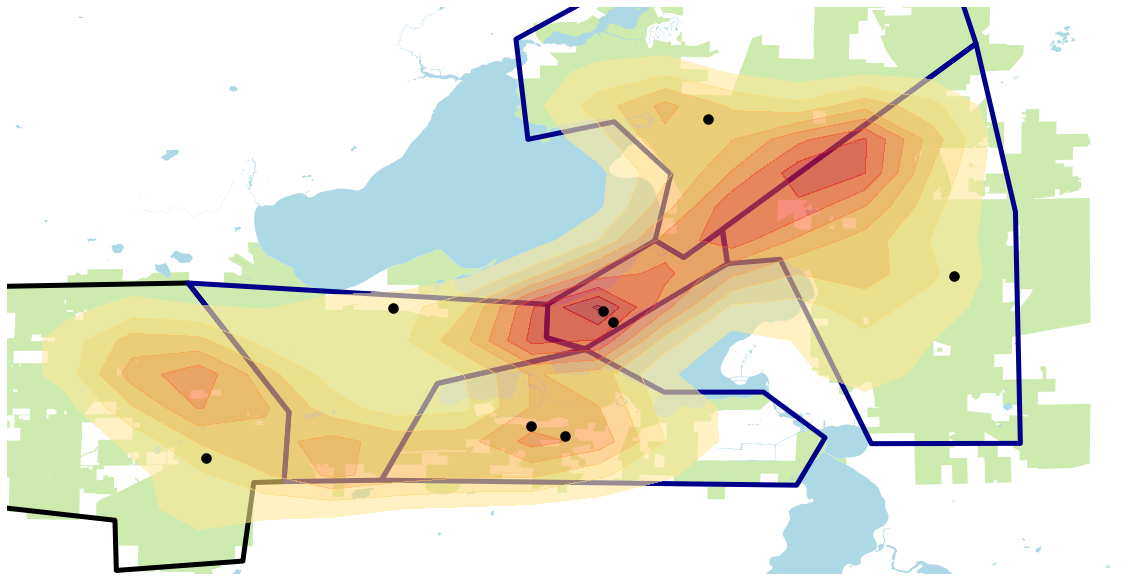

In [27]:
city = geopandas.read_file('city')
lakes = geopandas.read_file('lakes')
ax = city.plot(color = '#CDEBAF', figsize=(20,20))


lakes.plot(color = 'lightblue', ax=ax)
polygon.plot( ax = ax, alpha = 1, edgecolor = 'black', linewidth = 5, facecolor = 'none')
polygon2.plot( ax = ax, alpha = 1, edgecolor = 'darkblue', linewidth = 5, facecolor = 'none')
polygon3.plot( ax = ax, alpha = 1, edgecolor = 'darkblue', linewidth = 5, facecolor = 'none')
polygon4.plot( ax = ax, alpha = 1, edgecolor = 'darkblue', linewidth = 5, facecolor = 'none')
polygon5.plot( ax = ax, alpha = 1, edgecolor = 'darkblue', linewidth = 5, facecolor = 'none')
polygon6.plot( ax = ax, alpha = 1, edgecolor = 'darkblue', linewidth = 5, facecolor = 'none')
geoplot.kdeplot(
    gdf, cmap = 'YlOrRd', alpha = .6,
    shade = True, ax=ax,
    gridsize = 20,
    )
gdfp.plot(color = 'black', ax=ax, markersize = 100)

In [28]:
coords


,latitude,longitude,year
0,43.042067,-89.397161,2008
1,43.083816,-89.321695,2008
2,43.031200,-89.459160,2008
4,43.064229,-89.399203,2008
5,43.108440,-89.307382,2008
...,...,...,...
1829,43.112884,-89.363912,2019
1830,43.073284,-89.394109,2019
1831,43.126681,-89.308121,2019
1832,43.060849,-89.400858,2019


In [29]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 17 columns):
Unnamed: 0      1834 non-null int64
index           1834 non-null int64
IncidentID      1834 non-null int64
IncidentType    1834 non-null object
CaseNumber      1834 non-null object
IncidentDate    1834 non-null object
Arrested        299 non-null object
Address         1834 non-null object
Victim          1225 non-null object
latitude        1719 non-null float64
longitude       1719 non-null float64
date            1834 non-null object
year            1834 non-null int64
time            1834 non-null object
month           1834 non-null int64
all             1834 non-null datetime64[ns, UTC]
Stime           1834 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(5), object(9)
memory usage: 243.7+ KB


In [30]:
lat_interval = (43.175 - 43)/50
long_interval = (-89.60 + 89.25)/50

percent = {}


for i in range(0,50):
    for j in range(0,50):
        percent[(i,j)] = {}
        percent[(i,j)]['latitude_lower'] = 43 + (lat_interval * i)
        percent[(i,j)]['latitude_upper'] = 43 + lat_interval * (i+1)
        percent[(i,j)]['longitude_upper'] = -89.25 + (long_interval * j)
        percent[(i,j)]['longitude_lower'] = -89.25 + long_interval * (j+1)
for key in percent.keys():
    count = 0
    total = 0
    for i in range(0,len(rc['Arrested'])):
        if rc['latitude'][i] >= percent[key]['latitude_lower'] and rc['latitude'][i] < percent[key]['latitude_upper']:
            if rc['longitude'][i] >= percent[key]['longitude_lower'] and rc['longitude'][i] < percent[key]['longitude_upper']:
                    if not pd.isna(rc['Arrested'][i]):
                        count += 1
                    total +=1
    percent[key]['count'] = count
    percent[key]['total'] = total
    if total == 0:
        percent[key]['percent'] = 0
    else:
        percent[key]['percent'] = count/total

KeyboardInterrupt: 

In [ ]:
for key in percent.keys():
    if percent[key]['count'] == 0:
        percent[key]['color'] = (1,1,1)
    else:
        multiplier = percent[key]['percent']
        percent[key]['color'] = ((255 * multiplier) / 255, (255 * (1-multiplier))/255, 0)
percent

In [ ]:
y = np.linspace(43,43.175)
style.use('default')

for key in percent.keys():
    plt.axvspan(percent[key]['longitude_lower'],
                percent[key]['longitude_upper'],
                ymin=(percent[key]['latitude_lower']-43)/(43.175-43),
                ymax =(percent[key]['latitude_upper']-43)/(43.175-43),
                color = percent[key]['color'] )

plt.ylim(43,43.175)
plt.xlim(-89.60,-89.25)


In [ ]:
for key in percent.keys():
    plt.axvspan(percent[key]['longitude_lower'],
                percent[key]['longitude_upper'],
                ymin=(percent[key]['latitude_lower']-43)/(43.175-43),
                ymax =(percent[key]['latitude_upper']-43)/(43.175-43),
                color = percent[key]['color'] )

In [ ]:
fig, ax = plt.subplots()

ax.axvspan(-89.5, -89.4, ymin=0, ymax=.5, alpha=0.5, color='red')

ax.set_ylim([42,45])

In [34]:
lat_interval = (43.175 - 43)/40
long_interval = (-89.60 + 89.25)/40

percent = {}


for i in range(0,40):
    for j in range(0,40):
        percent[(i,j)] = {}
        percent[(i,j)]['latitude_lower'] = 43 + (lat_interval * i)
        percent[(i,j)]['latitude_upper'] = 43 + lat_interval * (i+1)
        percent[(i,j)]['longitude_upper'] = -89.25 + (long_interval * j)
        percent[(i,j)]['longitude_lower'] = -89.25 + long_interval * (j+1)

a_latitude = rc['latitude']
a_longitude = rc['longitude']
        
        
for key in percent.keys():
    count = 0
    total = 0
    key_lat_lower = percent[key]['latitude_lower']
    key_lat_upper = percent[key]['latitude_upper']
    key_long_lower = percent[key]['longitude_lower']
    key_long_upper = percent[key]['longitude_upper']
    for i in range(0,len(rc['Arrested'])):
        curr_latitude = a_latitude[i]
        curr_longitude =  a_longitude[i]
        if curr_latitude >= key_lat_lower and curr_latitude < key_lat_upper:
            if curr_longitude >= key_long_lower and curr_longitude < key_long_upper:
                    if not pd.isna(rc['Arrested'][i]):
                        count += 1
                    total += 1
    percent[key]['count'] = count
    percent[key]['total'] = total
    if total == 0:
        percent[key]['percent'] = 0
    else:
        percent[key]['percent'] = count/total

In [35]:
for key in percent.keys():
    multiplier = percent[key]['percent']
    if multiplier == 0:
        percent[key]['color'] = (1,1,1,0)
    elif multiplier <= 0.5:
        percent[key]['color'] = (200/255, 200 *(multiplier/0.5)/255, 0,.8)
    else:
        percent[key]['color'] = (200*((1-multiplier)/0.5)/255, 200/255, 0,.8)   
        
percent

{(0, 0): {'latitude_lower': 43.0,
  'latitude_upper': 43.004375,
  'longitude_upper': -89.25,
  'longitude_lower': -89.25875,
  'count': 0,
  'total': 0,
  'percent': 0,
  'color': (1, 1, 1, 0)},
 (0, 1): {'latitude_lower': 43.0,
  'latitude_upper': 43.004375,
  'longitude_upper': -89.25875,
  'longitude_lower': -89.2675,
  'count': 0,
  'total': 0,
  'percent': 0,
  'color': (1, 1, 1, 0)},
 (0, 2): {'latitude_lower': 43.0,
  'latitude_upper': 43.004375,
  'longitude_upper': -89.2675,
  'longitude_lower': -89.27625,
  'count': 0,
  'total': 0,
  'percent': 0,
  'color': (1, 1, 1, 0)},
 (0, 3): {'latitude_lower': 43.0,
  'latitude_upper': 43.004375,
  'longitude_upper': -89.27625,
  'longitude_lower': -89.285,
  'count': 0,
  'total': 0,
  'percent': 0,
  'color': (1, 1, 1, 0)},
 (0, 4): {'latitude_lower': 43.0,
  'latitude_upper': 43.004375,
  'longitude_upper': -89.285,
  'longitude_lower': -89.29375,
  'count': 0,
  'total': 0,
  'percent': 0,
  'color': (1, 1, 1, 0)},
 (0, 5): {'lat

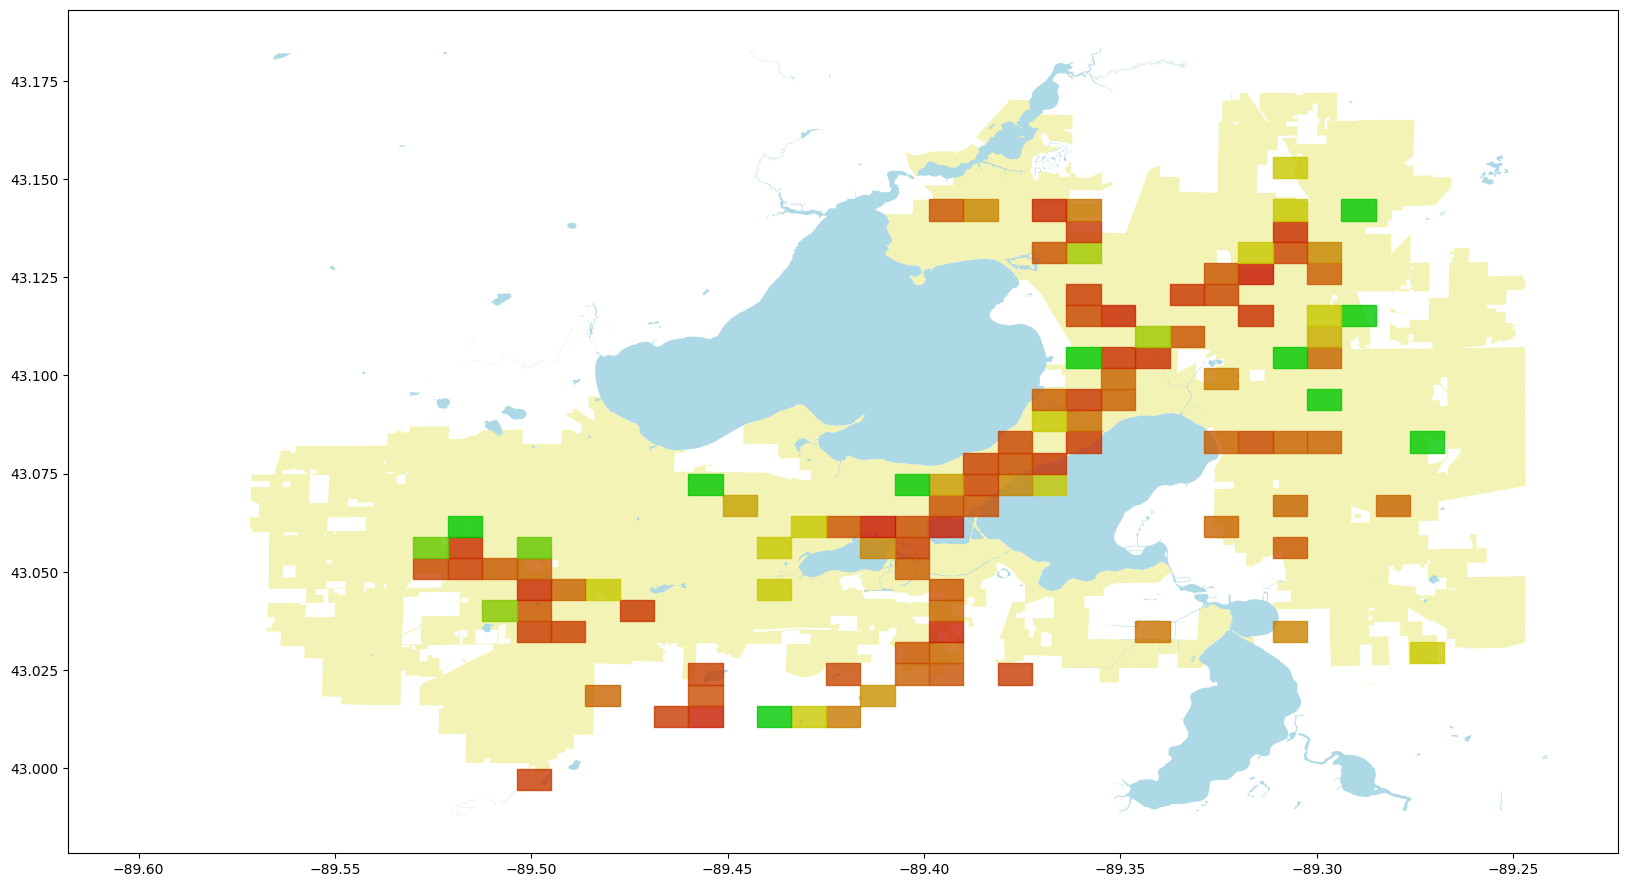

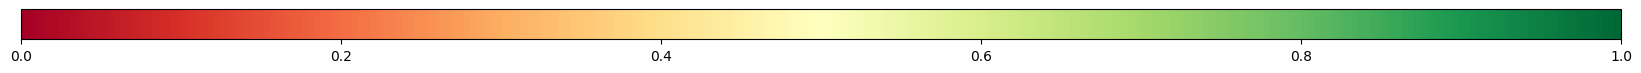

In [45]:
fig, ax = plt.subplots(figsize = (20,20))
style.use('default')
city.plot(color = '#F3F3B5', figsize=(20,20), ax=ax)
lakes.plot(color = 'lightblue', ax=ax)
for key in percent.keys():
    ax.axvspan(percent[key]['longitude_lower'],
                percent[key]['longitude_upper'],
                ymin=(percent[key]['latitude_lower']-43)/(43.175-43),
                ymax =(percent[key]['latitude_upper']-43)/(43.175-43),
                color = percent[key]['color'] )


a = np.array([[0,1]])
pl.figure(figsize=(20, 0.5))
img = pl.imshow(a, cmap="RdYlGn")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation = 'horizontal', cax=cax)


plt.savefig('bar.png',dpi=300)

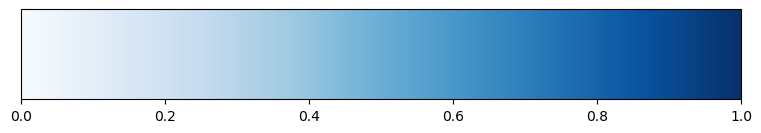

In [37]:
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap="Blues")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation = 'horizontal', cax=cax)


In [ ]:
cmap('Blues')